## Structured Data Learning Template for deep Neural Networks Using fast AI library

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.structured import *
from fastai.column_data import *
from sklearn.datasets import load_boston

np.set_printoptions(threshold=50, edgeitems=20)

PATH='data/manthan/'

## Create datasets

In [100]:
data= load_boston()
print(len(data.feature_names))

13


## Data Cleaning / Feature Engineering

## Durations

## Create features


## Linear Regression

Let's first apply a simple linear regression by scikit learn and see the baseline results and try using deep learning library to see if we can beat those results.


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
X=data.data
y=data.target

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.33, random_state=42)
model=LinearRegression().fit(X_train,y_train)

train_error= mean_squared_error(model.predict(X_train),y_train)
test_error= mean_squared_error(model.predict(X_test),y_test)
print('training error',train_error,'test_error',test_error)

training error 22.9834937317 test_error 20.7471433603


## DeepLearning

RMSE being the evaluation criteria

In [179]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

len(data.target.astype(np.float32))

506

Boston Dataset with chas being the categorical attribute

In [190]:
print(dl_data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


Cross Validation Indexes should be choosed randomly from the dataset 

In [196]:
import random
validation_indexes=random.sample(range(0,len(data.data)),math.floor (len(data.data)/4))
dl_data=pd.DataFrame(data.data,columns=data.feature_names)

Loads the columnar data with categorical values <br>
<b>PATH</b> -             all intermediate model or temp will be stored. make sure its empty. <br>
<b>validation_index</b> - indexes with validation_indexes will be used for validation<br>
<b>dl_data </b>-          dataframe to train<br>
<b>data.target </b>-      label <br>
<b>cat_flds</b> -         categorocial attributes<br>
<b>bs </b>                batch size for stochastic gradient descent<br>

In [197]:
model=ColumnarModelData.from_data_frame(PATH,validation_indexes,dl_data,data.target.astype(np.float32),cat_flds=['CHAS'],bs=2)

<b>embd for categorical attributes and their mapping like for (100 categories map -> 10)</b> -             Embedding <br>
<b>number_of_non_categorical_value</b> - number of non_categorical_values<br>
<b>layers </b>-           Number of hidden layers in sequence<br>
<b>drop_outs </b>-     Dropouts for each hidden layer <br>

In [198]:
embd=[(2,1)]
number_of_non_categorical_value=12
layers=[500]
drop_outs=[0.01]
model=model.get_learner(embd,number_of_non_categorical_value, 0.04, 1, layers,drop_outs)

This is new so take a breath. Hyperparameter tuning: Learning rate. Fast Ai runs a sample of algorithm with learning rate growing very fast. So we run the same training algorithm not to optimize the loss but to find the learning rate. Would be in seconds. Plotting the graph we can find the perfect learning rate and use that. Kudos FastAI!  

In [184]:
model.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 66%|██████▌   | 125/190 [00:00<00:00, 282.90it/s, loss=1.31e+04]


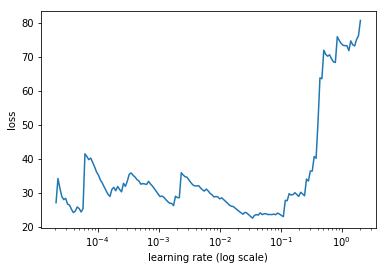

In [163]:
model.sched.plot()

In the above graph, as you can see clearly that the learning rate after 0.01 increases the loss exponentially, we see that loss turns to be minimum when 10^-1 to 10^-2 somewhere in between. So let's take average and use that as learning rate.

Run the training Algorithm with learning rate=0.055

In [170]:
lr = 0.055
model.fit(lr, 10)

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

[    0.       2851.906     108.26713]                            
[   1.       141.87092   74.62755]                              
[  2.       80.8053   74.09294]                              
[  3.       62.1405   48.24689]                              
[  4.       72.05487  42.68179]                              
[  5.       66.26097  38.59779]                              
[  6.       56.03842  51.331  ]                              
[  7.       76.14901  53.62796]                              
[  8.       62.7081   48.69091]                              
[  9.       66.54783  36.87793]                              



In [201]:
lr = 0.055
model.fit(lr, 10)

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

[    0.       3161.95849   250.97244]                            
[   1.       175.02604   58.23714]                              
[   2.       143.91199  121.4847 ]                           
[   3.       100.64932   56.82617]                           
[   4.       100.48409  306.14642]                           
[  5.       54.53278  51.57714]                              
[  6.       62.98428  49.65561]                              
[   7.       107.00727  137.59152]                           
[  8.       50.99336  41.78915]                              
[  9.       58.22794  43.40128]                              



Quite Impressive! Without any tuning, we achieved accuracy of 36.877 which is still bad as compared to linear regression. Note for this tutorial. Our goal is to learn and not optimize for the best accuracy.<br>
Let's see what can we do further.

There is onr problem with learning rate: As we get closer to the minima we should dynamically change the learning rate to slow down as we are approaching the bottom as we might skip the minima.
    But also, we dont want it to get stuck at local minima and sway away from a better solution if possible. 
    we come up with a solution so that we repeat the training process with lr=0.05 and keep decreasing for X number of cycles then reinitalize our lerarning rate to be 
    0.05 so that we can explore for other minimas too.
   <b>Cycle_len</b>=3 means repeat 10 cycles 3 times.

As you see the learning rate keeps decreasing and then suddenly jumps up. Let's see if this gives us any better results

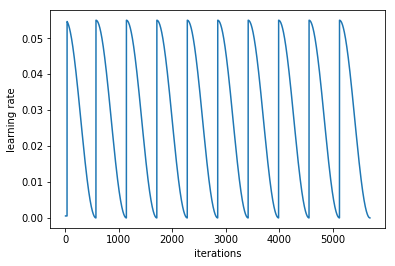

In [175]:
model.sched.plot_lr()

[ 14.       26.19841  29.11098]                              
[ 15.       26.13135  25.84457]                              
[ 16.       34.23843  39.32041]                              
[ 17.       45.23869  43.52927]                              
[ 18.       36.31802  28.51469]                              
[ 19.       24.40752  24.15434]                              
[ 20.       93.52787  98.36993]                              
[ 21.       76.76582  90.19366]                              
[ 22.       96.38318  89.78685]                              
[ 23.       78.99907  89.70096]                              
[ 24.      74.8405  89.2742]                                 
[ 25.       66.09479  88.88304]                              
[ 26.       76.044    88.72765]                              
[ 27.       78.88459  88.64732]                              
[ 28.       82.5089   88.76509]                              
[ 29.       96.25265  88.98195]                              
[ 30.   

In [171]:
lr = 0.055
model.fit(lr, 10,cycle_len=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=30), HTML(value='')))

[   0.       180.57534   62.10049]                          
[  1.       83.37878  62.3999 ]                              
[  2.       55.49154  54.9498 ]                              
[  3.       75.46293  53.33086]                              
[  4.       53.62135  39.90169]                              
[  5.       42.08134  38.87128]                              
[  6.       48.64498  53.91854]                              
[  7.       40.48751  31.60863]                              
[  8.       34.10004  27.93206]                              
[  9.       96.70617  31.44825]                              
[ 10.       50.85496  35.57478]                              
[ 11.       30.64704  25.51137]                              
[ 12.       42.23597  26.2089 ]                              
[ 13.       39.26633  51.34911]                              
[ 14.       26.69403  22.45991]                              
[ 15.       41.2912   29.34616]                              
[ 16.    

Kudos! Wow! we get better than linear regression!

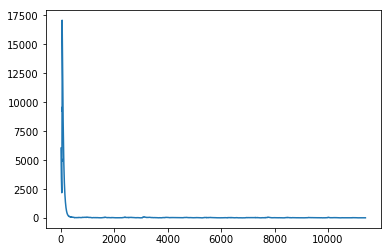

In [188]:
model.sched.plot_loss()

model